In [1]:
from rasterio import MemoryFile 
from rasterio.plot import show 
from urllib.request import urlopen 

In [2]:
url ='https://services.terrascope.be/wms/v2?service=WMS&version=1.3.0&request=GetMap&layers=CGS_S2_RADIOMETRY&format=image/png&time=2020-06-01&width=1920&height=592&bbox=556945.9,6657998.9,575290.8,6663655.2&styles=&srs=EPSG:3857'

{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 1920, 'height': 592, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'pixel'}


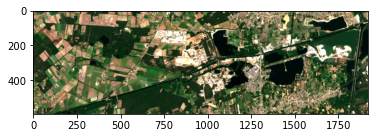

In [6]:
tif_bytes = urlopen(url).read() 
with MemoryFile(tif_bytes) as memfile: 
    with memfile.open() as dataset: 
        print(dataset.profile) 
        show(dataset) 

C:\Users\JEM\Anaconda3\lib\site-packages\rasterio\io.py:130: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  return DatasetReader(vsi_path, driver=driver, sharing=sharing, **kwargs)


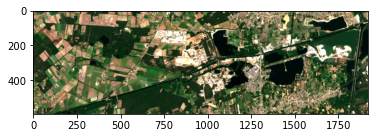

{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 1920, 'height': 592, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'pixel'}


In [7]:
from owslib.wms import WebMapService
from rasterio import MemoryFile
from rasterio.plot import show

url = 'https://services.terrascope.be/wms/v2?'
wms = WebMapService(url)

x_min = 556945.9710290054
y_min = 6657998.9149440415
x_max = 575290.8578174476
y_max = 6663655.255037144

layer = 'CGS_S2_RADIOMETRY'

img = wms.getmap(
    layers = [layer],
    srs = 'EPSG:3857',
    bbox = (x_min, y_min, x_max, y_max),
    size = (1920, 592),
    format = 'image/png',
    time = '2020-06-01'
)

with MemoryFile(img) as memfile:
     with memfile.open() as dataset:
            show(dataset)
            print(dataset.profile)